In [ ]:
import pandas as stocktrend_pand
StockTrends = stocktrend_pand.read_csv('DOGE.csv')
num_rows, num_columns = StockTrends.shape
print(f"Number of Rows in Doge Coin Stock   : {num_rows}")
print(f"Number of Columns in Doge Coin Stock: {num_columns}")
print("\nDoge Coin Stocks:\n", StockTrends)

Number of Rows in Doge Coin Stock   : 1817
Number of Columns in Doge Coin Stock: 7

Doge Coin Stocks:
             Date      Open      High       Low     Close  Adj Close  \
0     2017-11-09  0.001207  0.001415  0.001181  0.001415   0.001415   
1     2017-11-10  0.001421  0.001431  0.001125  0.001163   0.001163   
2     2017-11-11  0.001146  0.001257  0.001141  0.001201   0.001201   
3     2017-11-12  0.001189  0.001210  0.001002  0.001038   0.001038   
4     2017-11-13  0.001046  0.001212  0.001019  0.001211   0.001211   
...          ...       ...       ...       ...       ...        ...   
1812  2022-10-26  0.062856  0.073274  0.062760  0.072800   0.072800   
1813  2022-10-27  0.072799  0.084825  0.072033  0.077018   0.077018   
1814  2022-10-28  0.077028  0.087901  0.072930  0.083897   0.083897   
1815  2022-10-29  0.083933  0.149392  0.083387  0.121603   0.121603   
1816  2022-10-30  0.122086  0.140597  0.115983  0.120248   0.120248   

           Volume  
0         6259550  
1   

In [ ]:
StockTrends.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1817 entries, 0 to 1816
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1817 non-null   object 
 1   Open       1817 non-null   float64
 2   High       1817 non-null   float64
 3   Low        1817 non-null   float64
 4   Close      1817 non-null   float64
 5   Adj Close  1817 non-null   float64
 6   Volume     1817 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 99.5+ KB


In [ ]:
StockTrends['Close'].value_counts()

Close
0.002653    5
0.002630    4
0.002533    4
0.002510    4
0.002680    4
           ..
0.002675    1
0.002723    1
0.002681    1
0.002640    1
0.120248    1
Name: count, Length: 1599, dtype: int64

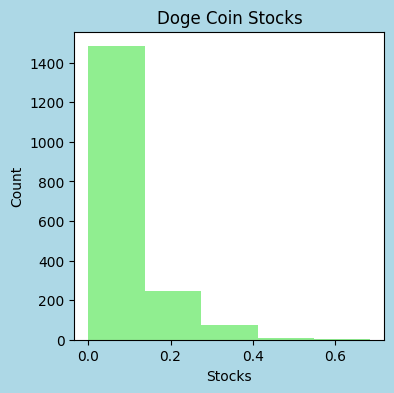

In [ ]:
import matplotlib.pyplot as stocktrend_matp
import warnings as stocktrendwrng
fig = stocktrend_matp.figure(figsize=(4, 4), facecolor='lightblue')
stocktrend_matp.hist(StockTrends['Close'], bins=5, color = "lightgreen")
stocktrend_matp.title('Doge Coin Stocks')
stocktrend_matp.xlabel("Stocks")
stocktrend_matp.ylabel("Count")
stocktrend_matp.show()

[Text(0.5, 1.0, 'Doge Coin Stock Price'),
 Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Stock Price')]

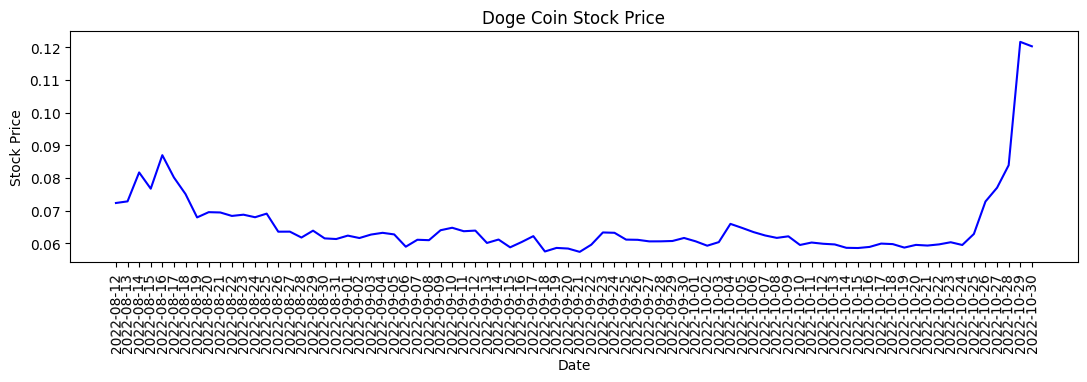

In [ ]:
stocktrend_matp.figure(figsize=(13, 3))
import seaborn as stocktrend_seb
stocktrend_matp.xticks(rotation=91)
stockline= stocktrend_seb.lineplot(x=StockTrends["Date"][-80:], y=StockTrends['Close'][-80:], color='blue')
stockline.set(title= 'Doge Coin Stock Price', xlabel ='Date', ylabel ='Stock Price')

In [ ]:
print("NaN in Doge Coin Stock :",StockTrends.isnull().values.sum())
print("Duplicates in Doge Coin Stock :",StockTrends[StockTrends.duplicated()].shape[0])

NaN in Doge Coin Stock : 0
Duplicates in Doge Coin Stock : 0


In [ ]:
stocktrendwrng.filterwarnings("ignore")
StockTrends= StockTrends[['Date', 'Close']]
StockTrends

,Date,Close
0,2017-11-09,0.001415
1,2017-11-10,0.001163
2,2017-11-11,0.001201
3,2017-11-12,0.001038
4,2017-11-13,0.001211
...,...,...
1812,2022-10-26,0.072800
1813,2022-10-27,0.077018
1814,2022-10-28,0.083897
1815,2022-10-29,0.121603


In [ ]:
import numpy as stocktrendnmpy
from tensorflow.keras.models import Sequential as stocktrendSqtial
from tensorflow.keras.layers import Dense as stocktrendDn

from sklearn.metrics import r2_score as stocktrendRsq
from sklearn.metrics import mean_absolute_error as stocktrendMAE
from sklearn.metrics import mean_squared_error as stocktrendMSE
import math as stocktrendMath

StockTrends = StockTrends.replace([stocktrendnmpy.inf, -stocktrendnmpy.inf, stocktrendnmpy.nan], 0).reset_index(drop=True)

In [ ]:
#====== Function to create sequences of data
def stocktrnd(stockTS, stockStep):
    stocktrend_X = []
    stocktrend_y = []
    for s in range(len(stockTS)):
        StockEnd = s + stockStep
        if StockEnd > len(stockTS)-1:
            break
        StockEnd_ip, StockEnd_op = stockTS[s:StockEnd], stockTS[StockEnd]
        stocktrend_X.append(StockEnd_ip)
        stocktrend_y.append(StockEnd_op)
    return stocktrendnmpy.array(stocktrend_X), stocktrendnmpy.array(stocktrend_y)

In [ ]:
#====== Training and testing the stock data
stockStep = 2
stocktrend_Xt, stocktrend_yt = stocktrnd(StockTrends['Close'][:-100].tolist(), stockStep)
stocktrend_Xs, stocktrend_ys = stocktrnd(StockTrends['Close'][-110:].tolist(), stockStep)
print("Doge Coin Stock Training: ", stocktrend_Xt.shape)
print("Doge Coin Stock Testing : ", stocktrend_Xs.shape)

Doge Coin Stock Training:  (1715, 2)
Doge Coin Stock Testing :  (108, 2)


In [ ]:
#====== Reshape the stock data
stocktrend_Xt = stocktrend_Xt.reshape(stocktrend_Xt.shape[0], stocktrend_Xt.shape[1], 1)
stocktrend_Xs = stocktrend_Xs.reshape(stocktrend_Xs.shape[0], stocktrend_Xs.shape[1], 1)

print("Reshaped Training Doge Coin Stock: ", stocktrend_Xt.shape)
print("Reshaped Testing Doge Coin Stock :", stocktrend_Xs.shape)

Reshaped Training Doge Coin Stock:  (1715, 2, 1)
Reshaped Testing Doge Coin Stock : (108, 2, 1)


## **Unidirectional Models**

### **Doge Coin Stock - Unidirectional LSTM**

Epoch 1/20
18/18 [==============================] - 2s 7ms/step - loss: 0.0061
Epoch 2/20
18/18 [==============================] - 0s 6ms/step - loss: 0.0043
Epoch 3/20
18/18 [==============================] - 0s 7ms/step - loss: 0.0036
Epoch 4/20
18/18 [==============================] - 0s 7ms/step - loss: 0.0031
Epoch 5/20
18/18 [==============================] - 0s 8ms/step - loss: 0.0027
Epoch 6/20
18/18 [==============================] - 0s 9ms/step - loss: 0.0022
Epoch 7/20
18/18 [==============================] - 0s 7ms/step - loss: 0.0018
Epoch 8/20
18/18 [==============================] - 0s 7ms/step - loss: 0.0013
Epoch 9/20
18/18 [==============================] - 0s 9ms/step - loss: 8.5631e-04
Epoch 10/20
18/18 [==============================] - 0s 8ms/step - loss: 5.1208e-04
Epoch 11/20
18/18 [==============================] - 0s 8ms/step - loss: 2.8843e-04
Epoch 12/20
18/18 [==============================] - 0s 10ms/step - loss: 1.6629e-04
Epoch 13/20
18/18 [=============

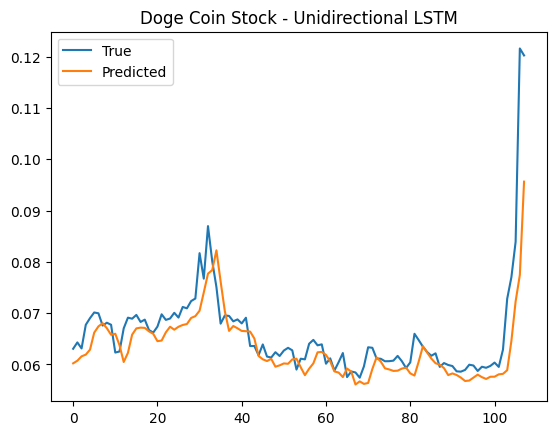

In [ ]:
from tensorflow.keras.layers import LSTM as stocktrendUnLST
#==== Define the model
stocktrend_AF = 'relu'
stocktrend_OF = 'adamax'
stocktrend_LF = 'huber'

stocktrendMo = stocktrendSqtial()
stocktrendMo.add(stocktrendUnLST(100, input_shape=(stockStep, 1), activation=stocktrend_AF))
stocktrendMo.add(stocktrendDn(1))

stocktrendMo.compile(loss=stocktrend_LF, optimizer=stocktrend_OF)

#==== Train the model
stocktrendHy = stocktrendMo.fit(stocktrend_Xt, stocktrend_yt, epochs=20, batch_size=100)
stocktrendYpdn = stocktrendMo.predict(stocktrend_Xs)

print("Evaluation of Doge Coin Stock - Unidirectional LSTM:\n")
print("Doge Coin Stock R2   = ", stocktrendRsq(stocktrend_ys, stocktrendYpdn))
print("Doge Coin Stock MAE  = ", stocktrendMAE(stocktrend_ys, stocktrendYpdn))
print("Doge Coin Stock MSE  = ", stocktrendMSE(stocktrend_ys, stocktrendYpdn))
print("Doge Coin Stock RMSE = ", stocktrendMath.sqrt(stocktrendMSE(stocktrend_ys, stocktrendYpdn)))

stocktrend_matp.title("Doge Coin Stock - Unidirectional LSTM")
stocktrend_matp.plot(stocktrend_ys, label='True')
stocktrend_matp.plot(stocktrendYpdn, label='Predicted')
stocktrend_matp.legend()
stocktrend_matp.show()

### **Doge Coin Stock - Unidirectional GRU**

Epoch 1/20
18/18 [==============================] - 2s 10ms/step - loss: 0.0049
Epoch 2/20
18/18 [==============================] - 0s 9ms/step - loss: 0.0029
Epoch 3/20
18/18 [==============================] - 0s 12ms/step - loss: 0.0022
Epoch 4/20
18/18 [==============================] - 0s 11ms/step - loss: 0.0015
Epoch 5/20
18/18 [==============================] - 0s 11ms/step - loss: 9.4765e-04
Epoch 6/20
18/18 [==============================] - 0s 11ms/step - loss: 5.0343e-04
Epoch 7/20
18/18 [==============================] - 0s 14ms/step - loss: 2.3370e-04
Epoch 8/20
18/18 [==============================] - 0s 13ms/step - loss: 1.3239e-04
Epoch 9/20
18/18 [==============================] - 0s 13ms/step - loss: 9.9152e-05
Epoch 10/20
18/18 [==============================] - 0s 14ms/step - loss: 9.5210e-05
Epoch 11/20
18/18 [==============================] - 0s 18ms/step - loss: 9.4198e-05
Epoch 12/20
18/18 [==============================] - 0s 15ms/step - loss: 9.2459e-05
Epoch 

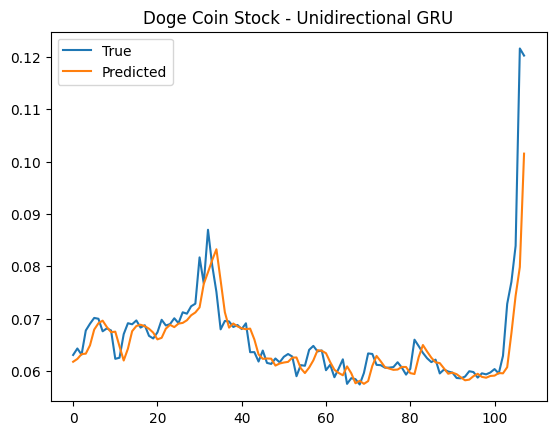

In [ ]:
from tensorflow.keras.layers import GRU as stocktrendUnGR
#==== Define the model
stocktrend_AF = 'relu'
stocktrend_OF = 'adamax'
stocktrend_LF = 'huber'

stocktrendMo = stocktrendSqtial()
stocktrendMo.add(stocktrendUnGR(100, input_shape=(stockStep, 1), activation=stocktrend_AF))
stocktrendMo.add(stocktrendDn(1))

stocktrendMo.compile(loss=stocktrend_LF, optimizer=stocktrend_OF)

#==== Train the model
stocktrendHy = stocktrendMo.fit(stocktrend_Xt, stocktrend_yt, epochs=20, batch_size=100)
stocktrendYpdn = stocktrendMo.predict(stocktrend_Xs)

print("Evaluation of Doge Coin Stock - Unidirectional GRU:\n")
print("Doge Coin Stock R2   = ", stocktrendRsq(stocktrend_ys, stocktrendYpdn))
print("Doge Coin Stock MAE  = ", stocktrendMAE(stocktrend_ys, stocktrendYpdn))
print("Doge Coin Stock MSE  = ", stocktrendMSE(stocktrend_ys, stocktrendYpdn))
print("Doge Coin Stock RMSE = ", stocktrendMath.sqrt(stocktrendMSE(stocktrend_ys, stocktrendYpdn)))

stocktrend_matp.title("Doge Coin Stock - Unidirectional GRU")
stocktrend_matp.plot(stocktrend_ys, label='True')
stocktrend_matp.plot(stocktrendYpdn, label='Predicted')
stocktrend_matp.legend()
stocktrend_matp.show()

### **Doge Coin Stock - Unidirectional RNN**

Epoch 1/20
18/18 [==============================] - 1s 4ms/step - loss: 0.0037
Epoch 2/20
18/18 [==============================] - 0s 5ms/step - loss: 5.2767e-04
Epoch 3/20
18/18 [==============================] - 0s 4ms/step - loss: 1.6267e-04
Epoch 4/20
18/18 [==============================] - 0s 5ms/step - loss: 1.0875e-04
Epoch 5/20
18/18 [==============================] - 0s 8ms/step - loss: 9.4552e-05
Epoch 6/20
18/18 [==============================] - 0s 5ms/step - loss: 9.1730e-05
Epoch 7/20
18/18 [==============================] - 0s 5ms/step - loss: 8.8472e-05
Epoch 8/20
18/18 [==============================] - 0s 4ms/step - loss: 8.6457e-05
Epoch 9/20
18/18 [==============================] - 0s 4ms/step - loss: 8.6691e-05
Epoch 10/20
18/18 [==============================] - 0s 5ms/step - loss: 8.5658e-05
Epoch 11/20
18/18 [==============================] - 0s 4ms/step - loss: 8.6314e-05
Epoch 12/20
18/18 [==============================] - 0s 4ms/step - loss: 8.2869e-05
Epoch

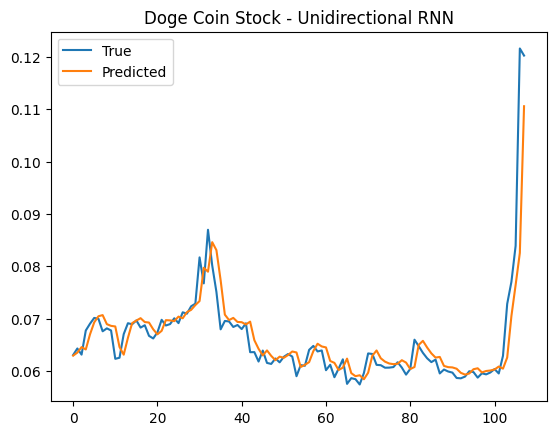

In [ ]:
from tensorflow.keras.layers import SimpleRNN as stocktrendUnRN
#==== Define the model
stocktrend_AF = 'relu'
stocktrend_OF = 'adamax'
stocktrend_LF = 'huber'

stocktrendMo = stocktrendSqtial()
stocktrendMo.add(stocktrendUnRN(100, input_shape=(stockStep, 1), activation=stocktrend_AF))
stocktrendMo.add(stocktrendDn(1))

stocktrendMo.compile(loss=stocktrend_LF, optimizer=stocktrend_OF)

#==== Train the model
stocktrendHy = stocktrendMo.fit(stocktrend_Xt, stocktrend_yt, epochs=20, batch_size=100)
stocktrendYpdn = stocktrendMo.predict(stocktrend_Xs)

print("Evaluation of Doge Coin Stock - Unidirectional RNN:\n")
print("Doge Coin Stock R2   = ", stocktrendRsq(stocktrend_ys, stocktrendYpdn))
print("Doge Coin Stock MAE  = ", stocktrendMAE(stocktrend_ys, stocktrendYpdn))
print("Doge Coin Stock MSE  = ", stocktrendMSE(stocktrend_ys, stocktrendYpdn))
print("Doge Coin Stock RMSE = ", stocktrendMath.sqrt(stocktrendMSE(stocktrend_ys, stocktrendYpdn)))

stocktrend_matp.title("Doge Coin Stock - Unidirectional RNN")
stocktrend_matp.plot(stocktrend_ys, label='True')
stocktrend_matp.plot(stocktrendYpdn, label='Predicted')
stocktrend_matp.legend()
stocktrend_matp.show()

### **Doge Coin Stock - Stacked LSTM**

Epoch 1/20
18/18 [==============================] - 4s 20ms/step - loss: 0.0056
Epoch 2/20
18/18 [==============================] - 1s 32ms/step - loss: 0.0044
Epoch 3/20
18/18 [==============================] - 0s 27ms/step - loss: 0.0038
Epoch 4/20
18/18 [==============================] - 0s 25ms/step - loss: 0.0028
Epoch 5/20
18/18 [==============================] - 0s 24ms/step - loss: 0.0016
Epoch 6/20
18/18 [==============================] - 0s 26ms/step - loss: 5.2216e-04
Epoch 7/20
18/18 [==============================] - 0s 22ms/step - loss: 1.2506e-04
Epoch 8/20
18/18 [==============================] - 0s 26ms/step - loss: 1.1193e-04
Epoch 9/20
18/18 [==============================] - 0s 25ms/step - loss: 1.0843e-04
Epoch 10/20
18/18 [==============================] - 0s 21ms/step - loss: 1.0687e-04
Epoch 11/20
18/18 [==============================] - 0s 13ms/step - loss: 1.0622e-04
Epoch 12/20
18/18 [==============================] - 0s 13ms/step - loss: 1.0664e-04
Epoch 13/

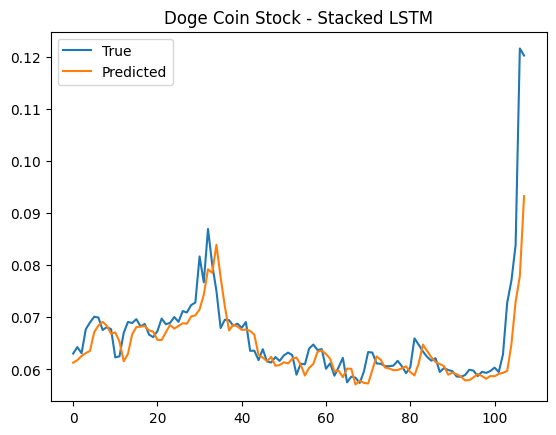

In [ ]:
from tensorflow.keras.layers import LSTM as stocktrendStLST
#==== Define the model
stocktrend_AF = 'relu'
stocktrend_OF = 'adamax'
stocktrend_LF = 'huber'

stocktrendMo = stocktrendSqtial()
stocktrendMo.add(stocktrendStLST(100, input_shape=(stockStep, 1), activation=stocktrend_AF, return_sequences=True))
stocktrendMo.add(stocktrendStLST(100, input_shape=(stockStep, 1), activation=stocktrend_AF))
stocktrendMo.add(stocktrendDn(1))

stocktrendMo.compile(loss=stocktrend_LF, optimizer=stocktrend_OF)

#==== Train the model
stocktrendHy = stocktrendMo.fit(stocktrend_Xt, stocktrend_yt, epochs=20, batch_size=100)
stocktrendYpdn = stocktrendMo.predict(stocktrend_Xs)

print("Evaluation of Doge Coin Stock - Stacked LSTM:\n")
print("Doge Coin Stock R2   = ", stocktrendRsq(stocktrend_ys, stocktrendYpdn))
print("Doge Coin Stock MAE  = ", stocktrendMAE(stocktrend_ys, stocktrendYpdn))
print("Doge Coin Stock MSE  = ", stocktrendMSE(stocktrend_ys, stocktrendYpdn))
print("Doge Coin Stock RMSE = ", stocktrendMath.sqrt(stocktrendMSE(stocktrend_ys, stocktrendYpdn)))

stocktrend_matp.title("Doge Coin Stock - Stacked LSTM")
stocktrend_matp.plot(stocktrend_ys, label='True')
stocktrend_matp.plot(stocktrendYpdn, label='Predicted')
stocktrend_matp.legend()
stocktrend_matp.show()

### **Doge Coin Stock - Stacked GRU**

Epoch 1/20
18/18 [==============================] - 3s 12ms/step - loss: 0.0043
Epoch 2/20
18/18 [==============================] - 0s 23ms/step - loss: 0.0025
Epoch 3/20
18/18 [==============================] - 0s 24ms/step - loss: 9.8612e-04
Epoch 4/20
18/18 [==============================] - 1s 29ms/step - loss: 1.6625e-04
Epoch 5/20
18/18 [==============================] - 0s 21ms/step - loss: 1.1616e-04
Epoch 6/20
18/18 [==============================] - 0s 24ms/step - loss: 9.8528e-05
Epoch 7/20
18/18 [==============================] - 0s 21ms/step - loss: 9.6889e-05
Epoch 8/20
18/18 [==============================] - 0s 21ms/step - loss: 9.8699e-05
Epoch 9/20
18/18 [==============================] - 0s 22ms/step - loss: 9.6216e-05
Epoch 10/20
18/18 [==============================] - 0s 21ms/step - loss: 9.5918e-05
Epoch 11/20
18/18 [==============================] - 0s 23ms/step - loss: 9.4888e-05
Epoch 12/20
18/18 [==============================] - 0s 21ms/step - loss: 9.4364e-

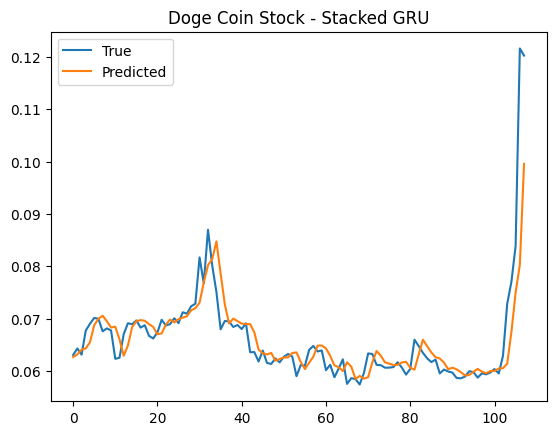

In [ ]:
from tensorflow.keras.layers import GRU as stocktrendStGR
#==== Define the model
stocktrend_AF = 'relu'
stocktrend_OF = 'adamax'
stocktrend_LF = 'huber'

stocktrendMo = stocktrendSqtial()
stocktrendMo.add(stocktrendStGR(100, input_shape=(stockStep, 1), activation=stocktrend_AF, return_sequences=True))
stocktrendMo.add(stocktrendStGR(100, input_shape=(stockStep, 1), activation=stocktrend_AF))
stocktrendMo.add(stocktrendDn(1))

stocktrendMo.compile(loss=stocktrend_LF, optimizer=stocktrend_OF)

#==== Train the model
stocktrendHy = stocktrendMo.fit(stocktrend_Xt, stocktrend_yt, epochs=20, batch_size=100)
stocktrendYpdn = stocktrendMo.predict(stocktrend_Xs)

print("Evaluation of Doge Coin Stock - Stacked GRU:\n")
print("Doge Coin Stock R2   = ", stocktrendRsq(stocktrend_ys, stocktrendYpdn))
print("Doge Coin Stock MAE  = ", stocktrendMAE(stocktrend_ys, stocktrendYpdn))
print("Doge Coin Stock MSE  = ", stocktrendMSE(stocktrend_ys, stocktrendYpdn))
print("Doge Coin Stock RMSE = ", stocktrendMath.sqrt(stocktrendMSE(stocktrend_ys, stocktrendYpdn)))

stocktrend_matp.title("Doge Coin Stock - Stacked GRU")
stocktrend_matp.plot(stocktrend_ys, label='True')
stocktrend_matp.plot(stocktrendYpdn, label='Predicted')
stocktrend_matp.legend()
stocktrend_matp.show()

### **Doge Coin Stock - Stacked RNN**

Epoch 1/20
18/18 [==============================] - 3s 14ms/step - loss: 0.0056
Epoch 2/20
18/18 [==============================] - 0s 15ms/step - loss: 0.0044
Epoch 3/20
18/18 [==============================] - 0s 14ms/step - loss: 0.0038
Epoch 4/20
18/18 [==============================] - 0s 14ms/step - loss: 0.0029
Epoch 5/20
18/18 [==============================] - 0s 12ms/step - loss: 0.0017
Epoch 6/20
18/18 [==============================] - 0s 15ms/step - loss: 7.0608e-04
Epoch 7/20
18/18 [==============================] - 0s 12ms/step - loss: 1.6847e-04
Epoch 8/20
18/18 [==============================] - 0s 14ms/step - loss: 1.0714e-04
Epoch 9/20
18/18 [==============================] - 0s 12ms/step - loss: 1.1060e-04
Epoch 10/20
18/18 [==============================] - 0s 15ms/step - loss: 1.0542e-04
Epoch 11/20
18/18 [==============================] - 0s 13ms/step - loss: 1.0589e-04
Epoch 12/20
18/18 [==============================] - 0s 14ms/step - loss: 1.0483e-04
Epoch 13/

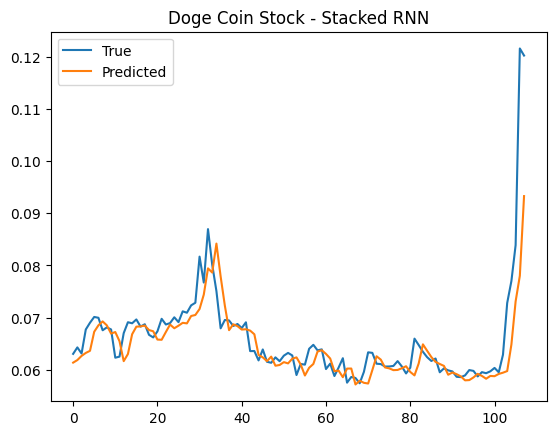

In [ ]:
from tensorflow.keras.layers import SimpleRNN as stocktrendStRN
#==== Define the model
stocktrend_AF = 'relu'
stocktrend_OF = 'adamax'
stocktrend_LF = 'huber'

stocktrendMo = stocktrendSqtial()
stocktrendMo.add(stocktrendStLST(100, input_shape=(stockStep, 1), activation=stocktrend_AF, return_sequences=True))
stocktrendMo.add(stocktrendStLST(100, input_shape=(stockStep, 1), activation=stocktrend_AF))
stocktrendMo.add(stocktrendDn(1))

stocktrendMo.compile(loss=stocktrend_LF, optimizer=stocktrend_OF)

#==== Train the model
stocktrendHy = stocktrendMo.fit(stocktrend_Xt, stocktrend_yt, epochs=20, batch_size=100)
stocktrendYpdn = stocktrendMo.predict(stocktrend_Xs)

print("Evaluation of Doge Coin Stock - Stacked RNN:\n")
print("Doge Coin Stock R2   = ", stocktrendRsq(stocktrend_ys, stocktrendYpdn))
print("Doge Coin Stock MAE  = ", stocktrendMAE(stocktrend_ys, stocktrendYpdn))
print("Doge Coin Stock MSE  = ", stocktrendMSE(stocktrend_ys, stocktrendYpdn))
print("Doge Coin Stock RMSE = ", stocktrendMath.sqrt(stocktrendMSE(stocktrend_ys, stocktrendYpdn)))

stocktrend_matp.title("Doge Coin Stock - Stacked RNN")
stocktrend_matp.plot(stocktrend_ys, label='True')
stocktrend_matp.plot(stocktrendYpdn, label='Predicted')
stocktrend_matp.legend()
stocktrend_matp.show()